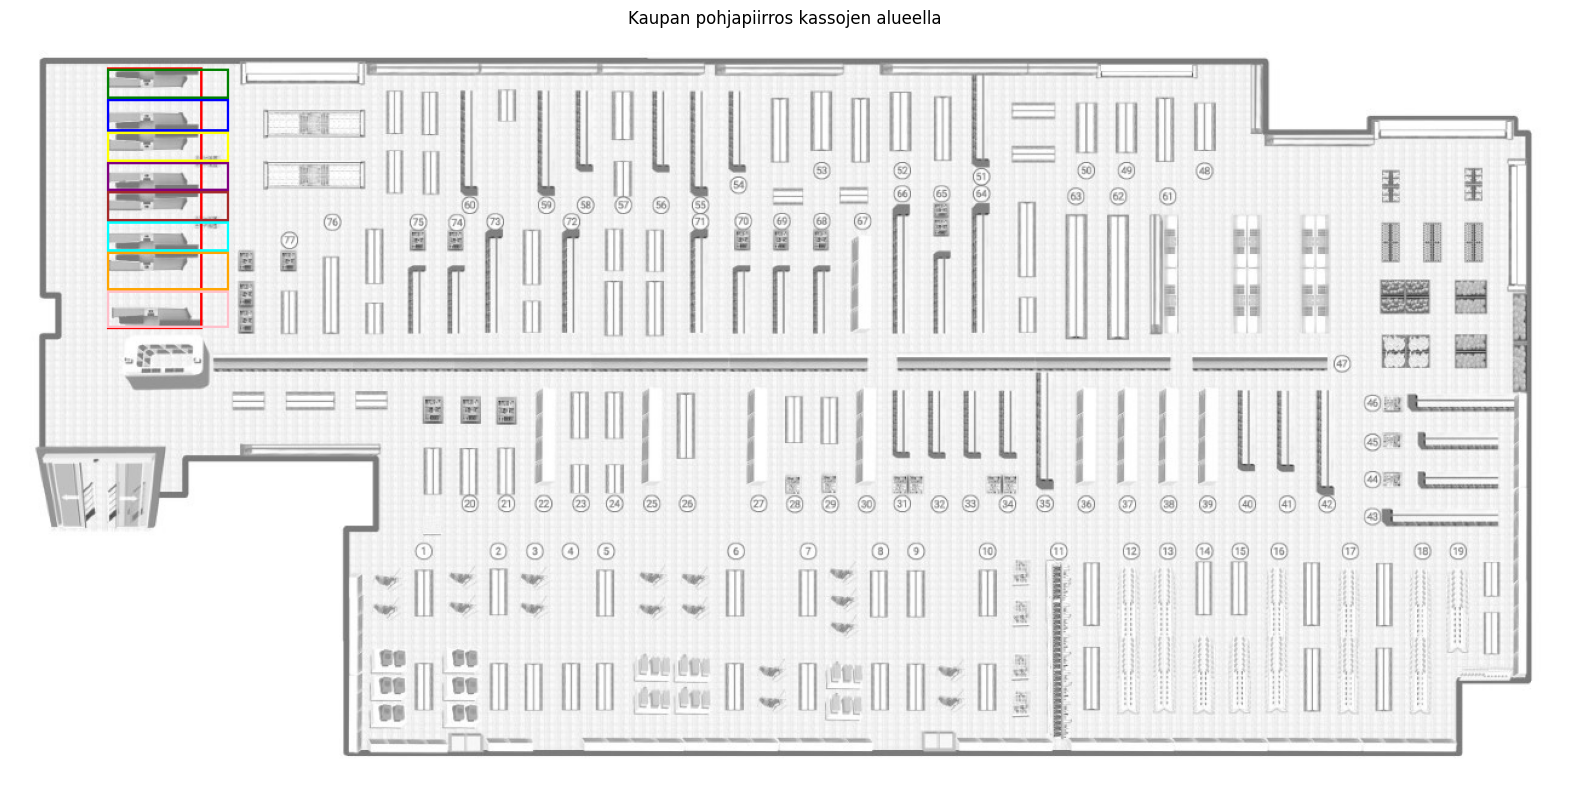

In [3]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# Lataa kaupan pohjapiirros
image_path = 'kauppa.jpg'
image = Image.open(image_path)

# Luo piirto-objekti
draw = ImageDraw.Draw(image)

# Määritä kassojen alue
kassa_alue = [(80, 30), (158, 245)]  # Määritä koordinaatit, jotka määrittävät kassojen alueen

kassa1 = [(80, 31), (158, 55)]

kassa2 = [(80, 56), (158, 82)]

kassa3 = [(80, 83), (158, 107)]

kassa4 = [(80, 108), (158, 131)]

kassa5 = [(80, 132), (158, 156)]

kassa6 = [(80, 157), (158, 181)]

kassa7 = [(80, 182), (158, 213)]

kassa8 = [(80, 214), (158, 244)]

plt.figure(figsize=(20, 18))
# Piirrä alue kaupan pohjapiirustukseen
draw.rectangle(kassa_alue, outline='red', width=2)
draw.rectangle(kassa1, outline='green', width=2)
draw.rectangle(kassa2, outline='blue', width=2)
draw.rectangle(kassa3, outline='yellow', width=2)
draw.rectangle(kassa4, outline='purple', width=2)
draw.rectangle(kassa5, outline='brown', width=2)
draw.rectangle(kassa6, outline='cyan', width=2)
draw.rectangle(kassa7, outline='orange', width=2)
draw.rectangle(kassa8, outline='pink', width=2)

# Näytä kuva ja plottaus
plt.imshow(image)
plt.title('Kaupan pohjapiirros kassojen alueella')
plt.axis('off')
plt.show()

In [3]:
import duckdb
import pandas as pd

# Määritä yhteys tietokantaan
connection = duckdb.connect(database='data/duckdb.database')

# Suorita SQL-kysely tietokannassa ja lue tulos DataFrameen
query = "SELECT * FROM Silver_SensorData"  # Korvaa your_table_name taulun nimen kanssa
df = connection.execute(query).fetchdf()


# Näytä DataFrame
print(df.head())

# Määritä kassojen alueet
kassojen_aluetta = [(80, 30), (180, 245)]  # Määritä koordinaatit, jotka määrittävät kassojen alueen
kassojen_lkm = 8  # Kassojen määrä

# Tarkista, kuinka monta asiakasta on kassojen alueella kullekin ajanhetkelle
asiakkaiden_lkm = []
for i, rivi in df.iterrows():
    x, y = rivi['x'], rivi['y']
    if kassojen_aluetta[0][0] <= x <= kassojen_aluetta[1][0] and kassojen_aluetta[0][1] <= y <= kassojen_aluetta[1][1]:
        asiakkaiden_lkm.append(i)

# Tulosta asiakkaiden määrä kassojen alueella
print("Asiakkaiden määrä kassojen alueella:", len(asiakkaiden_lkm))

# Jaa aikaikkunat ja laske keskimääräinen asiakkaiden määrä kassojen alueella kullekin aikaikkunalle
aikaikkunoiden_koko = '1H'  # Voit muuttaa aikaikkunoiden kokoa tarpeen mukaan
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)
asiakaslkm_aikaikkunoissa = df.groupby(pd.Grouper(freq=aikaikkunoiden_koko)).apply(lambda x: len(x[x.apply(lambda rivi: kassojen_aluetta[0][0] <= rivi['x'] <= kassojen_aluetta[1][0] and kassojen_aluetta[0][1] <= rivi['y'] <= kassojen_aluetta[1][1], axis=1)]))

# Tulosta asiakkaiden määrä kassojen alueella kullekin aikaikkunalle
print("Asiakkaiden määrä kassojen alueella kullekin aikaikkunalle:")
print(asiakaslkm_aikaikkunoissa)

   node_id                  timestamp   x   y  previous_x  previous_y  \
0     3200 2019-03-07 13:46:21.000078   0   0           0           0   
1     3200 2019-03-13 17:29:43.000686 -50  50           0           0   
2     3200 2019-03-13 17:29:45.000686 -50  50         -50          50   
3     3200 2019-03-13 17:29:46.000686 -50  50         -50          50   
4     3200 2019-03-13 17:29:47.000687 -50  50         -50          50   

    distance  timedelta     speed    x_scaled   y_scaled  
0   0.000000          1  0.000000  125.000000  26.000000  
1  70.710999     531801  0.000005  119.594467  31.431034  
2   0.000000          1  0.000000  119.594467  31.431034  
3   0.000000          1  0.000000  119.594467  31.431034  
4   0.000000          1  0.000000  119.594467  31.431034  


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x0000021337875210>>
Traceback (most recent call last):
  File "C:\Users\jonik\AppData\Roaming\Python\Python311\site-packages\ipykernel\ipkernel.py", line 790, in _clean_thread_parent_frames
    active_threads = {thread.ident for thread in threading.enumerate()}
                                                 ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jonik\AppData\Local\Programs\Python\Python311\Lib\threading.py", line 1494, in enumerate
    def enumerate():
    
KeyboardInterrupt: 


In [18]:
import duckdb
import pandas as pd

# Määritä yhteys tietokantaan
connection = duckdb.connect(database='data/duckdb.database')

# Määritä kassojen alueet
kassojen_aluetta = [(80, 30), (180, 245)]  # Määritä koordinaatit, jotka määrittävät kassojen alueen

# Suorita SQL-kysely tietokannassa ja suodata tiedot suoraan kyselyssä
query = """
    SELECT timestamp, x, y
    FROM Silver_SensorData
    WHERE x BETWEEN ? AND ? AND y BETWEEN ? AND ?
      AND EXTRACT(HOUR FROM timestamp) >= 9 AND EXTRACT(HOUR FROM timestamp) < 21
      AND CAST(timestamp AS TIME) >= '09:00:00' AND CAST(timestamp AS TIME) < '21:00:00'
"""
# Aseta parametrit kyselyyn
params = (kassojen_aluetta[0][0], kassojen_aluetta[1][0], kassojen_aluetta[0][1], kassojen_aluetta[1][1])

# Suorita kysely ja lue tulos DataFrameen
df_filtered = connection.execute(query, params).fetchdf()

# Näytä DataFrame
print(df_filtered.head())

# Jaa aikaikkunat ja laske keskimääräinen asiakkaiden määrä kassojen alueella kullekin aikaikkunalle
aikaikkunoiden_koko = '1H'  # Voit muuttaa aikaikkunoiden kokoa tarpeen mukaan
df_filtered['timestamp'] = pd.to_datetime(df_filtered['timestamp'])
df_filtered.set_index('timestamp', inplace=True)
asiakaslkm_aikaikkunoissa = df_filtered.groupby(pd.Grouper(freq=aikaikkunoiden_koko)).size()

# Tulosta asiakkaiden määrä kassojen alueella kullekin aikaikkunalle
print("Asiakkaiden määrä kassojen alueella kullekin aikaikkunalle:")
print(asiakaslkm_aikaikkunoissa)


print("Kokonaisriviä DataFramesta:", len(df_filtered))
print("Rivejä, joissa asiakkaat ovat kassojen alueella:", len(df_filtered[(df_filtered['x'] >= 80) & (df_filtered['x'] <= 180) & (df_filtered['y'] >= 30) & (df_filtered['y'] <= 245)]))



                   timestamp    x    y
0 2019-03-15 18:46:27.000687  107  150
1 2019-03-18 10:24:47.000688  122   76
2 2019-03-29 12:12:51.000921  114   69
3 2019-03-29 14:59:37.000925  136  160
4 2019-03-30 10:58:33.000924   86  129
Asiakkaiden määrä kassojen alueella kullekin aikaikkunalle:
timestamp
2019-03-07 15:00:00    9
2019-03-07 16:00:00    0
2019-03-07 17:00:00    0
2019-03-07 18:00:00    0
2019-03-07 19:00:00    0
                      ..
2020-01-19 10:00:00    0
2020-01-19 11:00:00    0
2020-01-19 12:00:00    0
2020-01-19 13:00:00    0
2020-01-19 14:00:00    1
Freq: h, Length: 7632, dtype: int64
Kokonaisriviä DataFramesta: 1170
Rivejä, joissa asiakkaat ovat kassojen alueella: 1170


C:\Users\jonik\AppData\Local\Temp\ipykernel_16840\2654003153.py:31: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  asiakaslkm_aikaikkunoissa = df_filtered.groupby(pd.Grouper(freq=aikaikkunoiden_koko)).size()


In [3]:
import duckdb
import pandas as pd

# Määritä yhteys tietokantaan
connection = duckdb.connect(database='data/duckdb.database')

# Määritä kassojen alueet
kassojen_aluetta = [(80, 30), (180, 245)]  # Määritä koordinaatit, jotka määrittävät kassojen alueen

# Määritä kaikki mahdolliset node_id:t
kaikki_node_id = ("3200", "3224", "3240", "42787", "45300", "51719", "51720", "51735", "51751", "51850", "51866", "51889", "51968", "51976", "51992", "52003", "52008", "52023", "52099", "52535", "53000", "53011", "53027", "53130", "53768", "53795", "53888", "53924", "53936", "54016", "64458")

# Suorita SQL-kysely tietokannassa ja suodata tiedot suoraan kyselyssä
query = """
    SELECT timestamp, x, y, node_id
    FROM Silver_SensorData
    WHERE x BETWEEN ? AND ? AND y BETWEEN ? AND ?
      AND EXTRACT(HOUR FROM timestamp) >= 9 AND EXTRACT(HOUR FROM timestamp) < 21
      AND CAST(timestamp AS TIME) >= '09:00:00' AND CAST(timestamp AS TIME) < '21:00:00'
      AND node_id IN {}
""".format(kaikki_node_id)

# Aseta parametrit kyselyyn
params = (kassojen_aluetta[0][0], kassojen_aluetta[1][0], kassojen_aluetta[0][1], kassojen_aluetta[1][1])

# Suorita kysely ja lue tulos DataFrameen
df_filtered = connection.execute(query, params).fetchdf()

# Näytä DataFrame
print(df_filtered.head())

# Jaa aikaikkunat ja laske keskimääräinen asiakkaiden määrä kassojen alueella kullekin aikaikkunalle
aikaikkunoiden_koko = '1H'  # Voit muuttaa aikaikkunoiden kokoa tarpeen mukaan
df_filtered['timestamp'] = pd.to_datetime(df_filtered['timestamp'])
df_filtered.set_index('timestamp', inplace=True)
asiakaslkm_aikaikkunoissa = df_filtered.groupby(pd.Grouper(freq=aikaikkunoiden_koko)).size()

# Ryhmittele DataFrame timestampin ja node_id:n perusteella ja laske jokaiselle aukioloajan tunti- ja päiväkohtaisesti käytössä olevien kassojen määrä
kassojen_maara_aikapisteittain = df_filtered.groupby([pd.Grouper(freq='H'), df_filtered.index.dayofweek, df_filtered.index.hour])['node_id'].nunique()

# Tulostetaan käytössä olevien kassojen määrä eri aukioloaikojen tunteina eri päivinä
print("Käytössä olevien kassojen määrä eri aukioloaikojen tunteina eri päivinä:")
print(kassojen_maara_aikapisteittain)

# Tulostetaan asiakkaiden määrä kassojen alueella kullekin aikaikkunalle
print("Asiakkaiden määrä kassojen alueella kullekin aikaikkunalle:")
print(asiakaslkm_aikaikkunoissa)


                   timestamp    x    y  node_id
0 2019-03-15 18:46:27.000687  107  150     3200
1 2019-03-18 10:24:47.000688  122   76     3200
2 2019-03-29 12:12:51.000921  114   69     3200
3 2019-03-29 14:59:37.000925  136  160     3200
4 2019-03-30 10:58:33.000924   86  129     3200
Käytössä olevien kassojen määrä eri aukioloaikojen tunteina eri päivinä:
timestamp            timestamp  timestamp
2019-03-07 15:00:00  3          15           3
2019-03-14 19:00:00  3          19           1
2019-03-15 18:00:00  4          18           1
2019-03-18 10:00:00  0          10           1
2019-03-20 18:00:00  2          18           1
                                            ..
2020-01-10 10:00:00  4          10           1
2020-01-10 14:00:00  4          14           1
2020-01-11 16:00:00  5          16           1
2020-01-15 14:00:00  2          14           1
2020-01-19 14:00:00  6          14           1
Name: node_id, Length: 279, dtype: int64
Asiakkaiden määrä kassojen alueella kul

C:\Users\jonik\AppData\Local\Temp\ipykernel_16840\4269753611.py:36: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  asiakaslkm_aikaikkunoissa = df_filtered.groupby(pd.Grouper(freq=aikaikkunoiden_koko)).size()
C:\Users\jonik\AppData\Local\Temp\ipykernel_16840\4269753611.py:39: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  kassojen_maara_aikapisteittain = df_filtered.groupby([pd.Grouper(freq='H'), df_filtered.index.dayofweek, df_filtered.index.hour])['node_id'].nunique()


                              x    y  node_id
timestamp                                    
2019-03-15 18:46:27.000687  107  150     3200
2019-03-18 10:24:47.000688  122   76     3200
2019-03-29 12:12:51.000921  114   69     3200
2019-03-29 14:59:37.000925  136  160     3200
2019-03-30 10:58:33.000924   86  129     3200


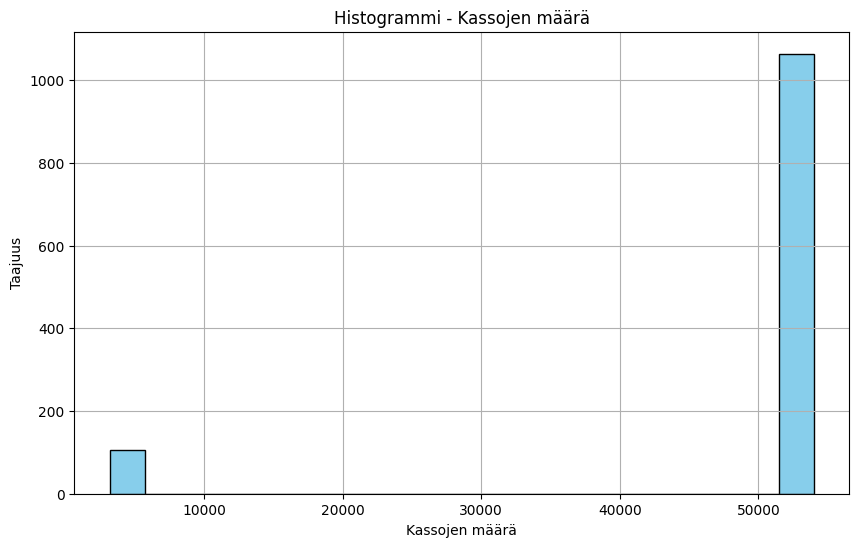

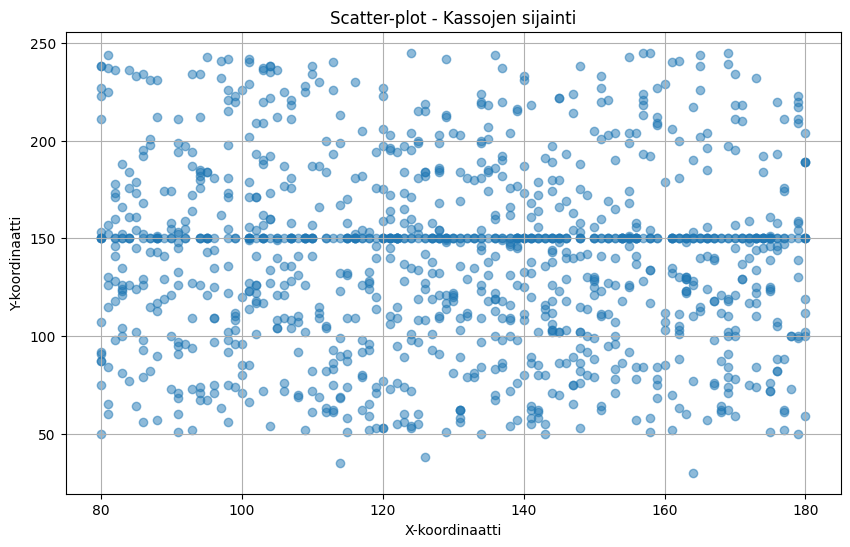

<Figure size 1200x600 with 0 Axes>

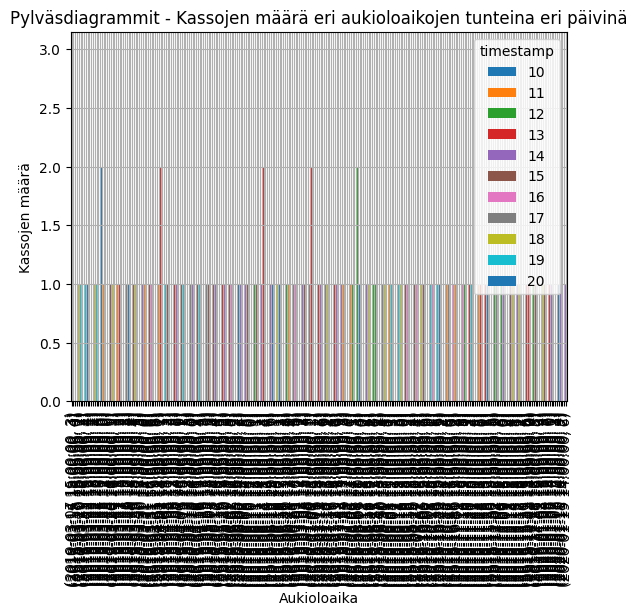

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

print(df_filtered.head())


# Histogrammit
plt.figure(figsize=(10, 6))
plt.hist(df_filtered['node_id'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogrammi - Kassojen määrä')
plt.xlabel('Kassojen määrä')
plt.ylabel('Taajuus')
plt.grid(True)
plt.show()

# Scatter-plotit
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['x'], df_filtered['y'], alpha=0.5)
plt.title('Scatter-plot - Kassojen sijainti')
plt.xlabel('X-koordinaatti')
plt.ylabel('Y-koordinaatti')
plt.grid(True)
plt.show()

# Pylväsdiagrammit
plt.figure(figsize=(12, 6))
df_kassojen_maara = kassojen_maara_aikapisteittain.unstack()
df_kassojen_maara.plot(kind='bar', stacked=True)
plt.title('Pylväsdiagrammit - Kassojen määrä eri aukioloaikojen tunteina eri päivinä')
plt.xlabel('Aukioloaika')
plt.ylabel('Kassojen määrä')
plt.grid(True)
plt.show()

